In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


In [100]:
np.random.seed(0)

In [101]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [103]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to the number of labels!"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not equal to the number of labels!"
assert(X_train.shape[1:]==(28,28)), "The dimension of the images is not equal to 28 x 28!"
assert(X_test.shape[1:]==(28,28)), "The dimension of the images is not equal to 28 x 28!"

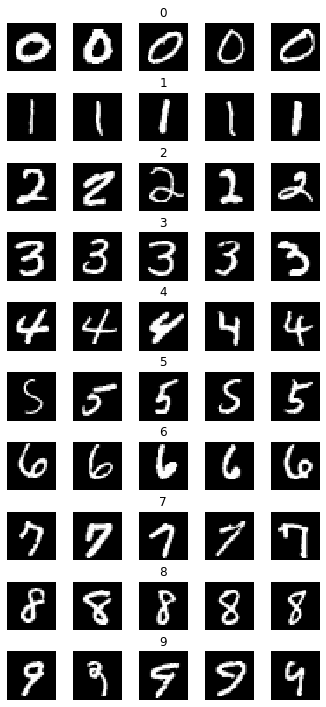

In [104]:
num_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, sharex=True, sharey=True, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

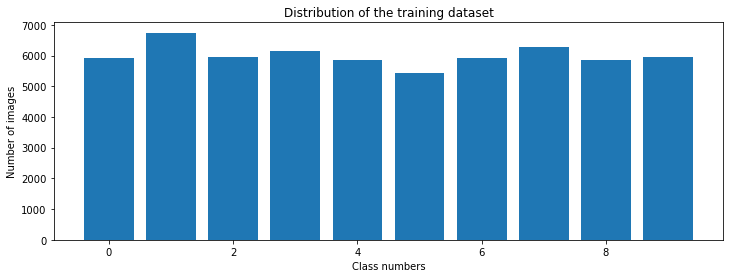

In [105]:
print(num_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class numbers')
plt.ylabel('Number of images')

In [106]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [107]:
y_train = y_train/255
y_test = y_test/255

In [108]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [109]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [110]:
model = create_model()
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0165 - accuracy: 0.0929 - val_loss: 0.0123 - val_accuracy: 0.0915
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0124 - accuracy: 0.0902 - val_loss: 0.0124 - val_accuracy: 0.0915
Epoch 3/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.0125 - accuracy: 0.0902 - val_loss: 0.0125 - val_accuracy: 0.0915
Epoch 4/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.0125 - accuracy: 0.0902 - val_loss: 0.0125 - val_accuracy: 0.0915
Epoch 5/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.0126 - accuracy: 0.0902 - val_loss: 0.0125 - val_accuracy: 0.0915
Epoch 6/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.0126 - accuracy: 0.0902 - val_loss: 0.0125 - val_accuracy: 0.0915
Epoch 7/10
54000/54000 [==============================] - 1s 17us/ste

Text(0.5, 0, 'epochs')

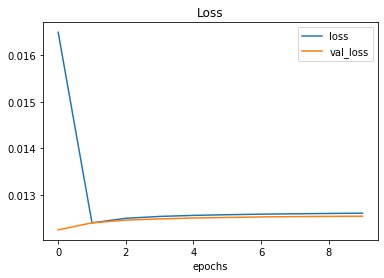

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epochs')



Text(0.5, 0, 'epochs')

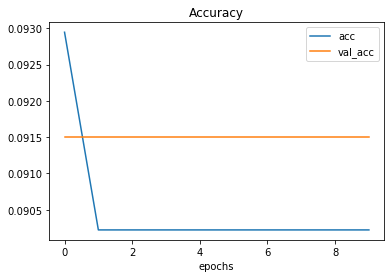

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epochs')

In [114]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.012665886467695236
Test accuracy: 0.08919999748468399


In [115]:
from PIL import Image
img = Image.open('./digit-2.png')
#plt.imshow(img)


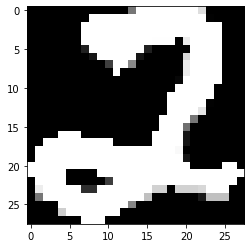

In [116]:
import cv2
img_array = np.asarray(img)
resized_img = cv2.resize(img_array, (28,28))
gray_scaled = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
final_image = cv2.bitwise_not(gray_scaled)
plt.imshow(final_image, cmap=plt.get_cmap('gray'))
#print(final_image.shape)



In [117]:
final_image = final_image/255
final_image = final_image.reshape(1, 784)


In [118]:
prediction = model.predict_classes(final_image)
print('Predicted:', str(prediction))


Predicted: [5]
